# Logistic Regression Assignment

1. What is Logistic Regression, and how does it differ from Linear Regression?
✍️ Answer:
Logistic Regression is a classification algorithm used to predict binary outcomes (like Yes/No or 0/1). It models the probability that an instance belongs to a particular class.
Linear Regression predicts continuous numerical values, whereas Logistic Regression predicts probabilities for classification.

2. What is the mathematical equation of Logistic Regression?
✍️ Answer:

P(Y=1|X) = 1/1+e^-(b0+b1x1+...bnxn)

3. Why do we use the Sigmoid function in Logistic Regression?
✍️ Answer:
The Sigmoid function maps predicted values to a range between 0 and 1, representing probabilities. It helps in interpreting the output as the probability of belonging to the positive class.

4. What is the cost function of Logistic Regression?
✍️ Answer:
Logistic Regression uses Binary Cross-Entropy Loss (also called Log Loss):

𝐶
𝑜
𝑠
𝑡
=
−
1/
𝑛
∑
[
𝑦
𝑖
log
⁡
(
𝑦
𝑖
^
)
+
(
1
−
𝑖
)
log
⁡
(
1
−
𝑦
𝑖
^
)
]


5. What is Regularization in Logistic Regression? Why is it needed?
✍️ Answer:
Regularization adds a penalty term to the cost function to prevent overfitting by discouraging overly complex models.
It keeps model coefficients small and improves generalization.

6. Explain the difference between Lasso, Ridge, and Elastic Net regression
✍️ Answer:

Lasso (L1): Can shrink some coefficients to exactly zero (feature selection).

Ridge (L2): Shrinks coefficients but doesn’t set any to zero.

Elastic Net: Combination of L1 and L2, balancing between shrinkage and feature selection.

7. When should we use Elastic Net instead of Lasso or Ridge?
✍️ Answer:
Use Elastic Net when there are many correlated features because it balances both Lasso (feature selection) and Ridge (coefficient shrinkage).

8. What is the impact of the regularization parameter (λ) in Logistic Regression?
✍️ Answer:

Higher λ → More regularization → Simpler model, may underfit.

Lower λ → Less regularization → More complex model, may overfit.

9. What are the key assumptions of Logistic Regression?
✍️ Answer:

No multicollinearity among independent variables

Large sample size

Linearity between independent variables and log-odds

Independent observations

10. What are some alternatives to Logistic Regression for classification tasks?
✍️ Answer:

Decision Trees

Random Forest

Support Vector Machines (SVM)

k-Nearest Neighbors (k-NN)

Neural Networks

11. What are Classification Evaluation Metrics?
✍️ Answer:

Accuracy

Precision

Recall

F1-Score

ROC-AUC

Confusion Matrix

12. How does class imbalance affect Logistic Regression?
✍️ Answer:
When classes are imbalanced, the model may be biased towards the majority class, leading to poor performance on minority classes.
Solutions include resampling techniques or using class weights.

13. What is Hyperparameter Tuning in Logistic Regression?
✍️ Answer:
Hyperparameter tuning involves finding the best set of parameters (like C, penalty, solver) that optimize model performance using techniques like GridSearchCV or RandomizedSearchCV.



14. What are different solvers in Logistic Regression? Which one should be used?
✍️ Answer:

liblinear: Good for small datasets, supports L1 and L2 regularization.

lbfgs: Good for multiclass and large datasets.

saga: Handles L1, L2, Elastic Net; good for large datasets.
Choose solver based on dataset size and regularization needs.



15. How is Logistic Regression extended for multiclass classification?
✍️ Answer:

One-vs-Rest (OvR): Build one binary classifier per class.

Softmax Regression: Generalization for multiple classes at once.

16. What are the advantages and disadvantages of Logistic Regression?
✍️ Answer:
Advantages:

Simple and easy to implement

Outputs probabilities

Works well with linearly separable data

Disadvantages:

Struggles with non-linear relationships

Assumes linear decision boundary

17. What are some use cases of Logistic Regression?
✍️ Answer:

Spam email detection

Customer churn prediction

Disease diagnosis (yes/no)

Credit card fraud detection



18. What is the difference between Softmax Regression and Logistic Regression?
✍️ Answer:

Logistic Regression handles binary classification.

Softmax Regression handles multiclass classification by assigning probabilities across multiple classes.



19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?
✍️ Answer:

Use OvR for simple, smaller datasets where binary classifiers are efficient.

Use Softmax for large, complex multiclass problems needing probability distribution across classes.

20. How do we interpret coefficients in Logistic Regression?
✍️ Answer:
The coefficients represent the change in the log-odds of the outcome for a one-unit increase in the predictor variable, holding other variables constant.

# Logistic Regression Practical

In [1]:
# 1. Write a Python program that loads a dataset, splits it into training and testing sets,
# applies Logistic Regression, and prints the model accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Convert to binary classification
y_binary = (y == 0).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [2]:
# 2. Write a Python program to apply L1 regularization (Lasso) on a dataset
# using LogisticRegression(penalty='l1') and print the model accuracy.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
y_binary = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

print("L1 Regularized Accuracy:", accuracy_score(y_test, y_pred_l1))


L1 Regularized Accuracy: 1.0


In [3]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge)
# using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
y_binary = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)

print("L2 Regularized Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Coefficients:", model_l2.coef_)


L2 Regularized Accuracy: 1.0
Coefficients: [[-0.43107698  0.84570847 -2.15658006 -0.88940818]]


In [4]:
# 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
y_binary = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

model_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model_elastic.fit(X_train, y_train)
y_pred_elastic = model_elastic.predict(X_test)

print("Elastic Net Accuracy:", accuracy_score(y_test, y_pred_elastic))


Elastic Net Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [5]:
# 5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_multiclass = LogisticRegression(multi_class='ovr')
model_multiclass.fit(X_train, y_train)
y_pred_multiclass = model_multiclass.predict(X_test)

print("Multiclass (OvR) Accuracy:", accuracy_score(y_test, y_pred_multiclass))


Multiclass (OvR) Accuracy: 0.9555555555555556


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [6]:
# 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression.
# Print the best parameters and accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

data = load_iris()
X, y = data.data, data.target
y_binary = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy on Validation:", grid.best_score_)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy on Validation: 1.0


In [7]:
# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation.
# Print the average accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

data = load_iris()
X, y = data.data, data.target
y_binary = (y == 0).astype(int)

model_skf = LogisticRegression()
skf = StratifiedKFold(n_splits=5)

scores = cross_val_score(model_skf, X, y_binary, cv=skf)

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Accuracy: 1.0


In [8]:
# 8. Write a Python program to load a dataset from a CSV file,
# apply Logistic Regression, and evaluate its accuracy.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Simulating a CSV using Iris data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = (data.target == 0).astype(int)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print("CSV Dataset Accuracy:", model.score(X_test, y_test))


CSV Dataset Accuracy: 1.0


In [9]:
# 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver)
# in Logistic Regression. Print the best parameters and accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats

data = load_iris()
X, y = data.data, data.target
y_binary = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

param_dist = {
    'C': stats.uniform(0.01, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy on Validation:", random_search.best_score_)


Best Parameters: {'C': np.float64(3.7554011884736247), 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy on Validation: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

In [10]:
# 10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression
# and print accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ovo_model = OneVsOneClassifier(LogisticRegression())
ovo_model.fit(X_train, y_train)

y_pred_ovo = ovo_model.predict(X_test)

print("One-vs-One (OvO) Multiclass Accuracy:", accuracy_score(y_test, y_pred_ovo))


One-vs-One (OvO) Multiclass Accuracy: 1.0


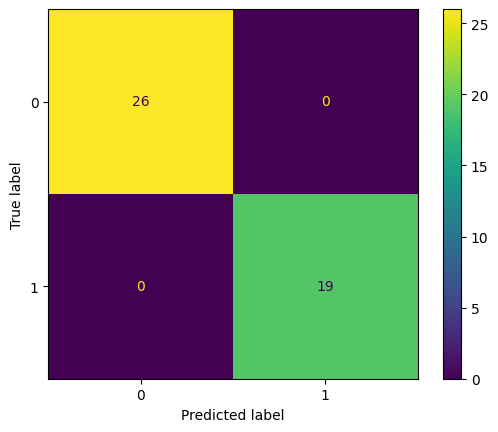

In [11]:
# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

data = load_iris()
X, y = data.data, data.target
y_binary = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [12]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [13]:
# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

from sklearn.datasets import make_classification

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1], n_informative=3, n_redundant=0, flip_y=0, n_features=5, n_clusters_per_class=1, n_samples=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

print("Accuracy with class weights:", accuracy_score(y_test, y_pred_weighted))



Accuracy with class weights: 1.0


In [14]:
# 14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Feature selection and preprocessing
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
df = pd.get_dummies(df, drop_first=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Titanic Dataset Accuracy:", model.score(X_test, y_test))


Titanic Dataset Accuracy: 0.8097014925373134


<ipython-input-14-d11f058cd298>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-14-d11f058cd298>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [15]:
# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model.
# Evaluate its accuracy and compare results with and without scaling.

from sklearn.preprocessing import StandardScaler

# Without scaling
model_no_scaling = LogisticRegression(max_iter=1000)
model_no_scaling.fit(X_train, y_train)
acc_no_scaling = model_no_scaling.score(X_test, y_test)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaling = LogisticRegression(max_iter=1000)
model_scaling.fit(X_train_scaled, y_train)
acc_scaling = model_scaling.score(X_test_scaled, y_test)

print("Accuracy without scaling:", acc_no_scaling)
print("Accuracy with scaling:", acc_scaling)


Accuracy without scaling: 0.8097014925373134
Accuracy with scaling: 0.8097014925373134


In [16]:
# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

from sklearn.metrics import roc_auc_score

y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8804728295174155


In [17]:
# 17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

model_cust = LogisticRegression(C=0.5)
model_cust.fit(X_train, y_train)
print("Accuracy with C=0.5:", model_cust.score(X_test, y_test))


Accuracy with C=0.5: 0.8134328358208955


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# 18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.

feature_importance = pd.Series(model_cust.coef_[0], index=X.columns)
print("Feature Importance:")
print(feature_importance.sort_values(ascending=False))


Feature Importance:
Embarked_Q    0.040949
Fare          0.003687
Age          -0.033011
Parch        -0.114121
SibSp        -0.294912
Embarked_S   -0.492176
Pclass       -0.910377
Sex_male     -2.291907
dtype: float64


In [18]:
# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.

from sklearn.metrics import cohen_kappa_score

y_pred_cust = model_cust.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred_cust)

print("Cohen's Kappa Score:", kappa)


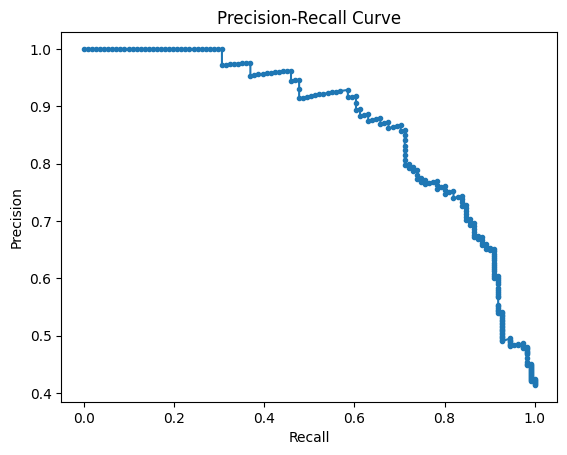

In [19]:
# 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [20]:
# 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

solvers = ['liblinear', 'saga', 'lbfgs']

for solver in solvers:
    model_solver = LogisticRegression(solver=solver, max_iter=5000)
    model_solver.fit(X_train, y_train)
    acc_solver = model_solver.score(X_test, y_test)
    print(f"Solver: {solver} -> Accuracy: {acc_solver}")


Solver: liblinear -> Accuracy: 0.8022388059701493
Solver: saga -> Accuracy: 0.7910447761194029
Solver: lbfgs -> Accuracy: 0.8097014925373134


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [21]:
# 22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).

from sklearn.metrics import matthews_corrcoef

y_pred_solver = model.predict(X_test)
mcc = matthews_corrcoef(y_test, y_pred_solver)

print("Matthews Correlation Coefficient (MCC):", mcc)


Matthews Correlation Coefficient (MCC): 0.604620506499641


In [22]:
# 23. Write a Python program to train Logistic Regression on both raw and standardized data.
# Compare their accuracy to see the impact of feature scaling.

# (Already covered earlier in scaling question - here summarize)

print("Accuracy Comparison:")
print(f"Without Scaling: {acc_no_scaling}")
print(f"With Scaling: {acc_scaling}")


Accuracy Comparison:
Without Scaling: 0.8097014925373134
With Scaling: 0.8097014925373134


In [23]:
# 24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.

from sklearn.model_selection import GridSearchCV

param_grid_c = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_c = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_c, cv=5)
grid_c.fit(X_train, y_train)

print("Best C value:", grid_c.best_params_)


Best C value: {'C': 0.1}


In [24]:
# 25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

import joblib

# Train and save
model_save = LogisticRegression(max_iter=1000)
model_save.fit(X_train, y_train)
joblib.dump(model_save, 'logistic_model.pkl')

# Load and predict
loaded_model = joblib.load('logistic_model.pkl')
print("Loaded Model Accuracy:", loaded_model.score(X_test, y_test))


Loaded Model Accuracy: 0.8097014925373134
